<a href="https://colab.research.google.com/github/MD-ARIF-073/Solar-Power-Forecasting-Using-Machine-Learning-Models-and-Statistical-Methods-/blob/main/2_SolarPowerForecastinUsingCommonMachineLearningModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PatternDataset/FENI.csv")
df

,JulianTime,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,Precip_Pluvio1_mm_sum,Pres_Logger1_hPa_avg,RH_ThHyg1_per100_avg,ServiceButton_Logger1_-_max,Temp_Logger1_degC_avg,Temp_RefCell1_degC_avg,...,WindSpeed_Anemo2_ms_max_flag,SunElv_Ephemeris_avg_deg,GTI_RefCell1_Wm-2_avg_flag,GTI_RefCell1_Wm-2_avg,GTI_RefCell3_Wm-2_avg,GTI_RefCell2_Wm-2_avg_flag,GTI_RefCell2_Wm-2_avg,GTI_RefCell3_Wm-2_avg_flag,DHI_ThPyrh2_Wm-2_avg_flag,data-filled
0,6/8/2017 0:00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,1.000000e+20,10.034399,1.000000e+20,NaN,NaN,1.000000e+20,NaN,1.000000e+20,NaN,0
1,6/8/2017 0:01,66.5232,8.520180,69.8440,0.0,1001.79,90.1199,0,34.7333,29.2228,...,1.000000e+00,10.250059,1.000000e+00,62.5158,62.5524,1.000000e+00,62.6133,1.000000e+00,NaN,1
2,6/8/2017 0:02,67.7597,6.457400,70.8563,0.0,1001.80,89.7771,0,34.8000,29.2669,...,1.000000e+00,10.465835,1.000000e+00,63.6853,63.7527,1.000000e+00,63.8393,1.000000e+00,NaN,1
3,6/8/2017 0:03,69.9897,5.560540,72.7392,0.0,1001.82,89.5770,0,34.8000,29.3015,...,1.000000e+00,10.681726,1.000000e+00,65.2003,65.2879,1.000000e+00,65.3468,1.000000e+00,NaN,1
4,6/8/2017 0:04,72.1525,4.618830,74.7913,0.0,1001.83,89.0712,0,34.8000,29.3412,...,1.000000e+00,10.897732,1.000000e+00,67.0631,67.0752,1.000000e+00,67.0964,1.000000e+00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,6/6/2019 4:09,182.7860,0.028563,187.4670,0.0,1004.06,87.3177,0,37.8000,33.3803,...,1.000000e+00,66.011382,1.000000e+00,178.7590,177.2040,1.000000e+00,176.8820,1.000000e+00,0.0,1
1048570,6/6/2019 4:10,170.5940,0.000000,170.5940,0.0,1004.09,86.4099,0,37.8000,33.2012,...,1.000000e+00,66.241071,1.000000e+00,161.2320,159.6230,1.000000e+00,159.6650,1.000000e+00,0.0,1
1048571,6/6/2019 4:11,145.0260,0.042845,150.1860,0.0,1004.09,86.3717,0,37.8000,32.9385,...,1.000000e+00,66.470777,1.000000e+00,139.5450,137.9900,1.000000e+00,138.1840,1.000000e+00,0.0,1
1048572,6/6/2019 4:12,118.5470,0.085690,122.1680,0.0,1004.11,87.0515,0,37.8000,32.6633,...,1.000000e+00,66.700501,1.000000e+00,113.6720,112.0160,1.000000e+00,112.3890,1.000000e+00,0.0,1


In [ ]:
df = pd.read_csv("FENI.csv")

In [ ]:
df = df.interpolate(method ='linear', limit_direction ='forward')

In [ ]:
df['JulianTime'] = pd.to_datetime(df['JulianTime'])

In [ ]:
df = df.set_index('JulianTime') 

In [ ]:

dfh = df.resample('H')



In [ ]:
dfh = dfh.mean()
dfh

,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,Precip_Pluvio1_mm_sum,Pres_Logger1_hPa_avg,RH_ThHyg1_per100_avg,ServiceButton_Logger1_-_max,Temp_Logger1_degC_avg,Temp_RefCell1_degC_avg,Temp_RefCell2_degC_avg,...,WindSpeed_Anemo2_ms_max_flag,SunElv_Ephemeris_avg_deg,GTI_RefCell1_Wm-2_avg_flag,GTI_RefCell1_Wm-2_avg,GTI_RefCell3_Wm-2_avg,GTI_RefCell2_Wm-2_avg_flag,GTI_RefCell2_Wm-2_avg,GTI_RefCell3_Wm-2_avg_flag,DHI_ThPyrh2_Wm-2_avg_flag,data-filled
JulianTime,,,,,,,,,,,,,,,,,,,,,
2017-06-08 00:00:00,139.695314,70.013164,163.115641,0.0,1002.197627,86.121703,0.000000,35.548273,31.666510,31.612222,...,1.666667e+18,16.456584,1.666667e+18,135.089808,135.480232,1.666667e+18,135.126534,1.666667e+18,NaN,0.983333
2017-06-08 01:00:00,237.807800,180.883083,337.112950,0.0,1002.736333,77.927108,0.000000,37.324165,37.448650,37.424927,...,1.000000e+00,29.725765,1.000000e+00,282.468383,282.194900,1.000000e+00,282.952317,1.000000e+00,NaN,1.000000
2017-06-08 02:00:00,257.939450,488.531533,607.167750,0.0,1002.728833,71.908793,0.000000,40.566400,45.756140,45.835902,...,1.000000e+00,43.228362,1.000000e+00,542.859050,541.901450,1.000000e+00,543.062717,1.000000e+00,NaN,1.000000
2017-06-08 03:00:00,421.498983,263.250293,649.180950,0.0,1002.583833,67.905498,0.000000,42.117630,52.135858,52.337822,...,1.000000e+00,56.884846,1.000000e+00,617.963800,616.079300,1.000000e+00,616.956883,1.000000e+00,NaN,1.000000
2017-06-08 04:00:00,324.551567,504.504767,808.624800,0.0,1002.291333,64.189218,0.000000,43.060973,56.753695,57.140438,...,1.000000e+00,70.638031,1.000000e+00,774.336383,772.494983,1.000000e+00,773.178033,1.000000e+00,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-06 00:00:00,137.944888,106.304600,171.318215,0.0,1002.292833,93.225460,0.000000,33.525943,29.749505,29.708478,...,1.000000e+00,16.479645,1.000000e+00,131.420740,130.905025,1.000000e+00,131.511205,1.000000e+00,0.0,1.000000
2019-06-06 01:00:00,272.344667,42.402187,294.174400,0.0,1003.037000,89.475963,0.016667,35.657112,33.643388,33.665533,...,1.000000e+00,29.768312,1.833333e+09,256.051583,255.842033,1.833333e+09,256.356950,1.833333e+09,0.0,1.000000
2019-06-06 02:00:00,339.969217,23.271551,358.914533,0.0,1003.793333,87.369838,0.000000,37.313858,35.812370,35.783832,...,1.000000e+00,43.287645,1.000000e+00,330.072100,327.686583,1.000000e+00,327.687650,1.000000e+00,0.0,1.000000


In [ ]:
data = dfh.iloc[0:740]
data


,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,Precip_Pluvio1_mm_sum,Pres_Logger1_hPa_avg,RH_ThHyg1_per100_avg,ServiceButton_Logger1_-_max,Temp_Logger1_degC_avg,Temp_RefCell1_degC_avg,Temp_RefCell2_degC_avg,...,WindSpeed_Anemo2_ms_max_flag,SunElv_Ephemeris_avg_deg,GTI_RefCell1_Wm-2_avg_flag,GTI_RefCell1_Wm-2_avg,GTI_RefCell3_Wm-2_avg,GTI_RefCell2_Wm-2_avg_flag,GTI_RefCell2_Wm-2_avg,GTI_RefCell3_Wm-2_avg_flag,DHI_ThPyrh2_Wm-2_avg_flag,data-filled
JulianTime,,,,,,,,,,,,,,,,,,,,,
2017-06-08 00:00:00,139.695314,70.013164,163.115641,0.0,1002.197627,86.121703,0.0,35.548273,31.666510,31.612222,...,1.666667e+18,16.456584,1.666667e+18,135.089808,135.480232,1.666667e+18,135.126534,1.666667e+18,NaN,0.983333
2017-06-08 01:00:00,237.807800,180.883083,337.112950,0.0,1002.736333,77.927108,0.0,37.324165,37.448650,37.424927,...,1.000000e+00,29.725765,1.000000e+00,282.468383,282.194900,1.000000e+00,282.952317,1.000000e+00,NaN,1.000000
2017-06-08 02:00:00,257.939450,488.531533,607.167750,0.0,1002.728833,71.908793,0.0,40.566400,45.756140,45.835902,...,1.000000e+00,43.228362,1.000000e+00,542.859050,541.901450,1.000000e+00,543.062717,1.000000e+00,NaN,1.000000
2017-06-08 03:00:00,421.498983,263.250293,649.180950,0.0,1002.583833,67.905498,0.0,42.117630,52.135858,52.337822,...,1.000000e+00,56.884846,1.000000e+00,617.963800,616.079300,1.000000e+00,616.956883,1.000000e+00,NaN,1.000000
2017-06-08 04:00:00,324.551567,504.504767,808.624800,0.0,1002.291333,64.189218,0.0,43.060973,56.753695,57.140438,...,1.000000e+00,70.638031,1.000000e+00,774.336383,772.494983,1.000000e+00,773.178033,1.000000e+00,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-08 15:00:00,0.002725,0.176629,0.002725,0.0,1003.131333,97.276553,0.0,34.950640,27.680998,27.592968,...,1.000000e+00,-31.779924,3.833395e+04,0.044932,0.043099,1.833415e+04,0.060756,4.000060e+04,1.000000e+20,1.000000
2017-07-08 16:00:00,0.072522,0.142765,0.072522,0.0,1003.553500,97.287943,0.0,34.672585,27.914447,27.825225,...,1.000000e+00,-39.612552,5.000050e+04,0.026195,0.039952,2.166745e+04,0.061099,4.000060e+04,1.000000e+20,1.000000
2017-07-08 17:00:00,0.003475,0.154489,0.003475,0.0,1003.417333,97.672878,0.0,34.495563,27.445240,27.370197,...,1.000000e+00,-44.028118,3.666730e+04,0.040358,0.049070,1.500085e+04,0.070493,3.166735e+04,1.000000e+20,1.000000


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'GHI'), Text(0.5, 1.0, 'GHI vs. Time')]

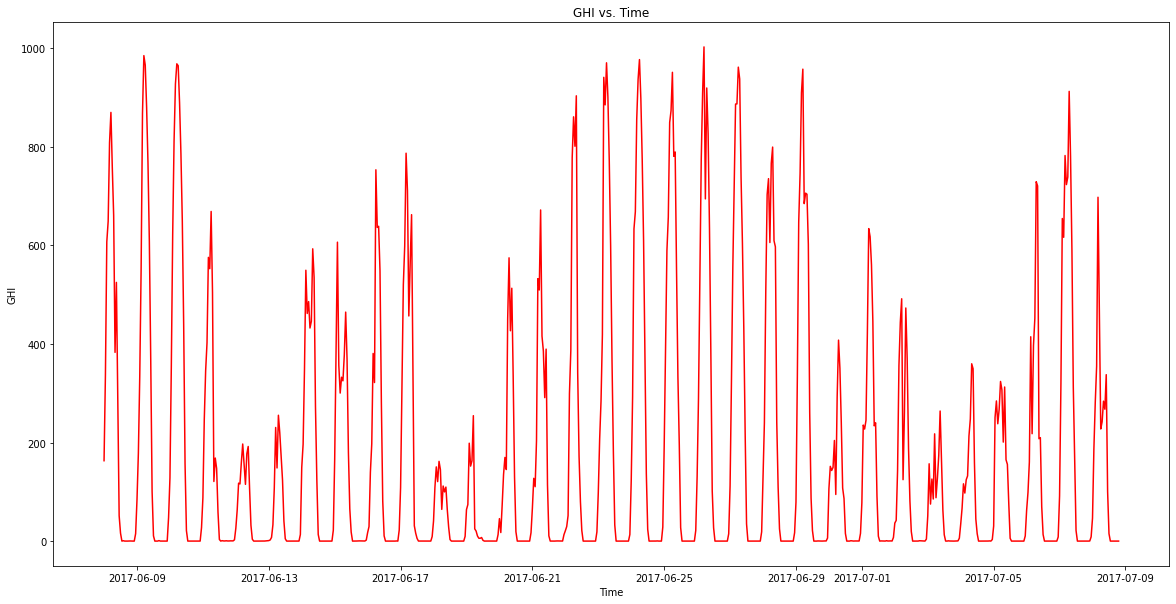

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
           data['GHI_ThPyra1_Wm-2_avg'],
           color='red')



ax.set(xlabel="Time",
       ylabel="GHI",
      title = "GHI vs. Time")

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'GHI'), Text(0.5, 1.0, 'DHI vs. Time')]

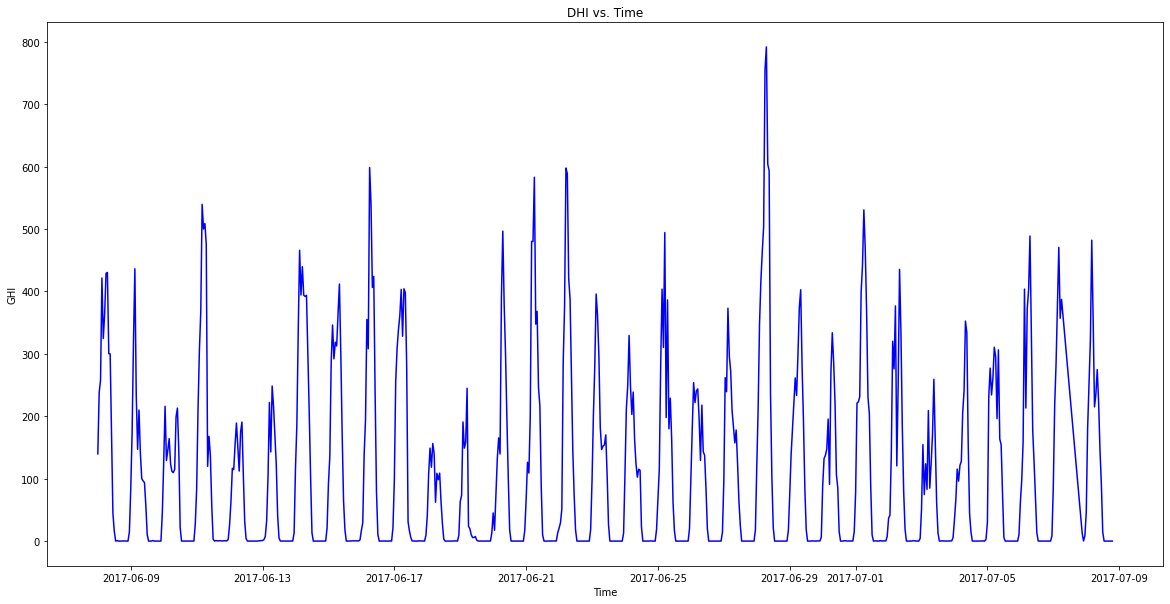

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
           data['DHI_ThPyra2_Wm-2_avg'],
           color='blue')



ax.set(xlabel="Time",
       ylabel="GHI",
      title = "DHI vs. Time")

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'GHI'), Text(0.5, 1.0, 'DNI vs. Time')]

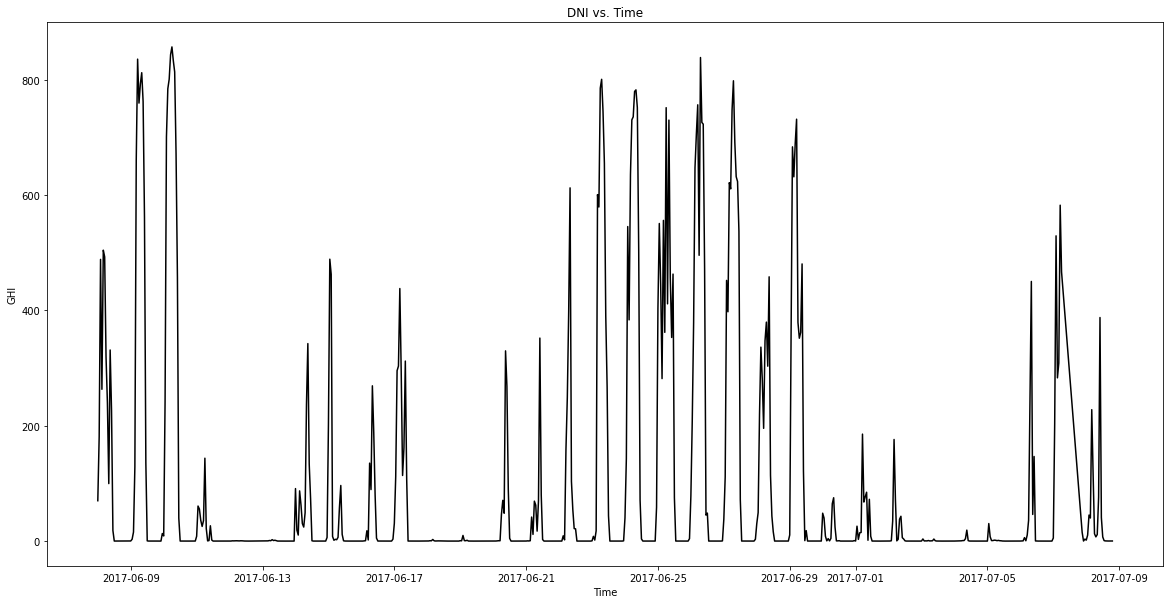

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
           data['DNI_ThPyrh1_Wm-2_avg'],
           color='black')



ax.set(xlabel="Time",
       ylabel="GHI",
      title = "DNI vs. Time")

In [ ]:
d = dfh.iloc[25:49]
d

,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,Precip_Pluvio1_mm_sum,Pres_Logger1_hPa_avg,RH_ThHyg1_per100_avg,ServiceButton_Logger1_-_max,Temp_Logger1_degC_avg,Temp_RefCell1_degC_avg,Temp_RefCell2_degC_avg,...,WindSpeed_Anemo2_ms_max_flag,SunElv_Ephemeris_avg_deg,GTI_RefCell1_Wm-2_avg_flag,GTI_RefCell1_Wm-2_avg,GTI_RefCell3_Wm-2_avg,GTI_RefCell2_Wm-2_avg_flag,GTI_RefCell2_Wm-2_avg,GTI_RefCell3_Wm-2_avg_flag,DHI_ThPyrh2_Wm-2_avg_flag,data-filled
JulianTime,,,,,,,,,,,,,,,,,,,,,
2017-06-09 01:00:00,175.166533,3.247386,178.425550,0.0,1001.465167,87.750357,0.0,34.669752,32.433368,32.357300,...,1.0,29.703547,1.000000e+00,164.087983,163.886300,1.000000e+00,163.987300,1.000000e+00,NaN,1.0
2017-06-09 02:00:00,320.740583,15.659686,333.330167,0.0,1002.032667,80.869558,0.0,35.937580,38.082668,38.147430,...,1.0,43.200007,1.000000e+00,310.974383,311.074400,1.000000e+00,311.578250,1.000000e+00,NaN,1.0
2017-06-09 03:00:00,436.186417,128.677013,551.601983,0.0,1002.266333,73.621020,0.0,38.238553,45.268410,45.271165,...,1.0,56.851032,1.000000e+00,503.152067,501.458750,1.000000e+00,501.966867,1.000000e+00,NaN,1.0
2017-06-09 04:00:00,234.008683,660.065912,867.947417,0.0,1001.997000,66.116710,0.0,40.436132,49.882805,49.886603,...,1.0,70.599128,1.000000e+00,832.517067,829.983000,1.000000e+00,830.647783,1.000000e+00,NaN,1.0
2017-06-09 05:00:00,146.886633,835.775767,985.236217,0.0,1001.492333,62.843422,0.0,41.325108,54.024690,54.042375,...,1.0,84.269833,1.000000e+00,958.714750,956.108317,1.000000e+00,956.595350,1.000000e+00,NaN,1.0
2017-06-09 06:00:00,209.932883,759.559783,966.030733,0.0,1000.749333,58.461767,0.0,42.368515,55.192813,55.043790,...,1.0,81.782048,1.000000e+00,948.900917,946.441700,1.000000e+00,946.885650,1.000000e+00,NaN,1.0
2017-06-09 07:00:00,141.337367,792.765067,880.781650,0.0,999.906583,61.621322,0.0,43.268718,54.382328,54.273892,...,1.0,67.990212,1.000000e+00,855.101700,853.429917,1.000000e+00,853.118050,1.000000e+00,NaN,1.0
2017-06-09 08:00:00,100.183722,812.265517,767.129933,0.0,998.972867,60.419197,0.0,44.232143,51.401307,51.233022,...,1.0,54.258294,1.000000e+00,726.117050,725.051300,1.000000e+00,724.067833,1.000000e+00,NaN,1.0
2017-06-09 09:00:00,96.402805,762.387050,606.753150,0.0,998.142217,59.659778,0.0,45.228027,45.220991,45.165140,...,1.0,40.633979,1.666667e+18,546.390667,546.233092,1.666667e+18,544.543592,1.666667e+18,NaN,1.0


[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'GHI'),
 Text(0.5, 1.0, 'Elevation Angle vs. Time')]

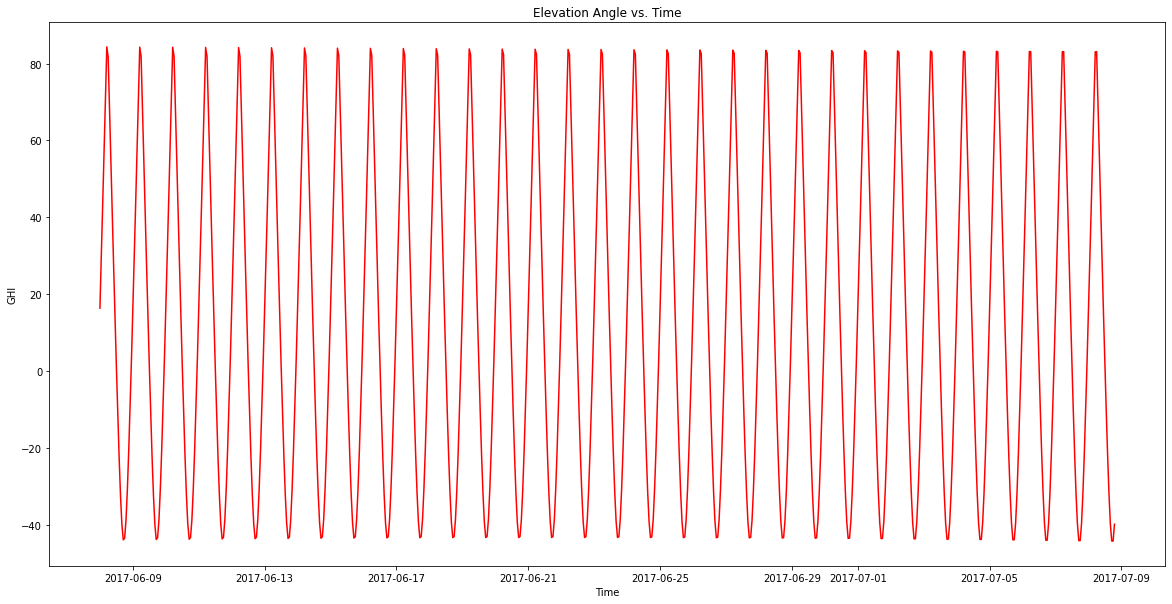

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(data.index.values,
           data['SunElv_Ephemeris_avg_deg'],
           color='red')



ax.set(xlabel="Time",
       ylabel="GHI",title = "Elevation Angle vs. Time")


In [ ]:
correlations = df.corr().abs().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'GHI_ThPyra1_Wm-2_avg' & col2 != 'GHI_ThPyra1_Wm-2_avg'") # Filter by variable

,col1,col2,correlation
249,GHI_ThPyra1_Wm-2_avg,GTI_RefCell2_Wm-2_avg,0.996056
253,GHI_ThPyra1_Wm-2_avg,GTI_RefCell3_Wm-2_avg,0.995842
256,GHI_ThPyra1_Wm-2_avg,GTI_RefCell1_Wm-2_avg,0.995166
302,GHI_ThPyra1_Wm-2_avg,Temp_RefCell3_degC_avg,0.882384
307,GHI_ThPyra1_Wm-2_avg,Temp_RefCell2_degC_avg,0.881732
313,GHI_ThPyra1_Wm-2_avg,Temp_RefCell1_degC_avg,0.879124
318,GHI_ThPyra1_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,0.869766
320,GHI_ThPyra1_Wm-2_avg,DHI_ThPyra2_Wm-2_avg,0.845398
358,GHI_ThPyra1_Wm-2_avg,SunElv_Ephemeris_avg_deg,0.769690
401,GHI_ThPyra1_Wm-2_avg,RH_ThHyg1_per100_avg,0.625249


In [ ]:
dfh = dfh.drop(['GTI_RefCell2_Wm-2_avg', 'GTI_RefCell3_Wm-2_avg', 'GTI_RefCell1_Wm-2_avg', 'Temp_Logger1_degC_avg', 
           'Pres_Logger1_hPa_avg', 'ServiceButton_Logger1_-_max_flag', 'ServiceButton_Logger1_-_max_flag',
           'Temp_RefCell3_degC_avg_flag', 'GTI_RefCell2_Wm-2_avg_flag', 'GTI_RefCell3_Wm-2_avg_flag',
           'GTI_RefCell1_Wm-2_avg_flag', 'DHI_ThPyra2_Wm-2_avg_flag', 'ServiceButton_Logger1_-_max',
           'DNI_ThPyrh1_Wm-2_avg_flag', 'Precip_Pluvio1_mm_sum_flag', 'Temp_ThPyra2_degC_avg_flag',
           'Temp_ThPyra1_degC_avg_flag', 'WindDir_Wvane1_deg_avg360_flag', 'WindDir_Wvane1_deg_avg360',
           'GHI_ThPyra1_Wm-2_avg_flag', 'Temp_ThPyrh1_degC_avg_flag', 'DHI_ThPyrh2_Wm-2_avg_flag',
           'Temp_Logger1_degC_avg_flag', 'Precip_Pluvio1_mm_sum', 'WindSpeed_Anemo1_ms_avg_flag',
           'WindSpeed_Anemo1_ms_max_flag', 'WindSpeed_Anemo2_ms_avg_flag', 'WindSpeed_Anemo2_ms_max_flag',
           'data-filled', 'Temp_RefCell2_degC_avg_flag', 'Temp_RefCell1_degC_avg_flag', 'Pres_Logger1_hPa_avg_flag',
          'Temp_ThHyg1_degC_avg_flag','RH_ThHyg1_per100_avg_flag', 'WindSpeed_Anemo2_ms_max', 'WindSpeed_Anemo2_ms_avg', 'WindSpeed_Anemo1_ms_max', 'Temp_ThPyrh1_degC_avg',
                'Temp_ThPyra2_degC_avg', 'Temp_ThPyra1_degC_avg', 'Temp_ThHyg1_degC_avg', 'Temp_RefCell3_degC_avg', 'Temp_RefCell2_degC_avg',
             'WindSpeed_Anemo2_ms_max', 'WindSpeed_Anemo2_ms_avg', 'WindSpeed_Anemo1_ms_max', 'Temp_ThPyrh1_degC_avg',
             'Temp_ThPyra2_degC_avg', 'Temp_ThPyra1_degC_avg', 'Temp_ThHyg1_degC_avg', 'Temp_RefCell3_degC_avg', 'Temp_RefCell2_degC_avg'],axis=1)
dfh

,DHI_ThPyra2_Wm-2_avg,DNI_ThPyrh1_Wm-2_avg,GHI_ThPyra1_Wm-2_avg,RH_ThHyg1_per100_avg,Temp_RefCell1_degC_avg,WindSpeed_Anemo1_ms_avg,SunElv_Ephemeris_avg_deg
JulianTime,,,,,,,
2017-06-08 00:00:00,139.695314,70.013164,163.115641,86.121703,31.666510,1.697830,16.456584
2017-06-08 01:00:00,237.807800,180.883083,337.112950,77.927108,37.448650,1.318106,29.725765
2017-06-08 02:00:00,257.939450,488.531533,607.167750,71.908793,45.756140,1.550040,43.228362
2017-06-08 03:00:00,421.498983,263.250293,649.180950,67.905498,52.135858,1.193106,56.884846
2017-06-08 04:00:00,324.551567,504.504767,808.624800,64.189218,56.753695,1.129672,70.638031
...,...,...,...,...,...,...,...
2019-06-06 00:00:00,137.944888,106.304600,171.318215,93.225460,29.749505,2.351576,16.479645
2019-06-06 01:00:00,272.344667,42.402187,294.174400,89.475963,33.643388,2.736794,29.768312
2019-06-06 02:00:00,339.969217,23.271551,358.914533,87.369838,35.812370,3.145320,43.287645


In [ ]:
dfh = dfh.rename(columns = {'DHI_ThPyra2_Wm-2_avg' : 'DHI_Wm-2', 'DNI_ThPyrh1_Wm-2_avg' : 'DNI_Wm-2', 'GHI_ThPyra1_Wm-2_avg' : 
                           'GHI_Wm-2', 'RH_ThHyg1_per100_avg' : 'Relative_Humidity_per100', 'Temp_RefCell1_degC_avg' :
                           'Temp_degC', 'WindSpeed_Anemo1_ms_avg' : 'WindSpeed_ms', 'SunElv_Ephemeris_avg_deg' :
                           'SunElevation_deg'})
dfh

,DHI_Wm-2,DNI_Wm-2,GHI_Wm-2,Relative_Humidity_per100,Temp_degC,WindSpeed_ms,SunElevation_deg
JulianTime,,,,,,,
2017-06-08 00:00:00,139.695314,70.013164,163.115641,86.121703,31.666510,1.697830,16.456584
2017-06-08 01:00:00,237.807800,180.883083,337.112950,77.927108,37.448650,1.318106,29.725765
2017-06-08 02:00:00,257.939450,488.531533,607.167750,71.908793,45.756140,1.550040,43.228362
2017-06-08 03:00:00,421.498983,263.250293,649.180950,67.905498,52.135858,1.193106,56.884846
2017-06-08 04:00:00,324.551567,504.504767,808.624800,64.189218,56.753695,1.129672,70.638031
...,...,...,...,...,...,...,...
2019-06-06 00:00:00,137.944888,106.304600,171.318215,93.225460,29.749505,2.351576,16.479645
2019-06-06 01:00:00,272.344667,42.402187,294.174400,89.475963,33.643388,2.736794,29.768312
2019-06-06 02:00:00,339.969217,23.271551,358.914533,87.369838,35.812370,3.145320,43.287645


In [ ]:
import scipy.stats as st

In [ ]:
correlations = dfh.corr().abs().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'v2' & col2 != 'v2'") # Filter by variable
correlations

,col1,col2,correlation
0,DHI_Wm-2,DHI_Wm-2,1.000000
1,DNI_Wm-2,DNI_Wm-2,1.000000
2,WindSpeed_ms,WindSpeed_ms,1.000000
3,Temp_degC,Temp_degC,1.000000
4,GHI_Wm-2,GHI_Wm-2,1.000000
5,Relative_Humidity_per100,Relative_Humidity_per100,1.000000
6,SunElevation_deg,SunElevation_deg,1.000000
7,Temp_degC,GHI_Wm-2,0.890930
8,GHI_Wm-2,Temp_degC,0.890930
9,DNI_Wm-2,GHI_Wm-2,0.873257


In [ ]:
correlations = dfh.corr().abs().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'GHI_Wm-2' & col2 != 'GHI_Wm-2'") # Filter by variable

,col1,col2,correlation
8,GHI_Wm-2,Temp_degC,0.890930
10,GHI_Wm-2,DNI_Wm-2,0.873257
11,GHI_Wm-2,DHI_Wm-2,0.863626
15,GHI_Wm-2,SunElevation_deg,0.791819
27,GHI_Wm-2,Relative_Humidity_per100,0.642460
44,GHI_Wm-2,WindSpeed_ms,0.327434


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='Temp_degC'>

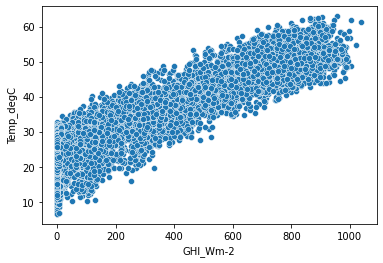

In [ ]:
sns.scatterplot(dfh['GHI_Wm-2'],dfh['Temp_degC'])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='DNI_Wm-2'>

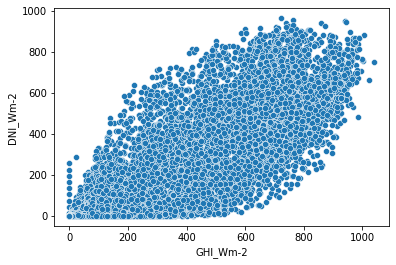

In [ ]:
sns.scatterplot(dfh['GHI_Wm-2'],dfh['DNI_Wm-2'])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='DHI_Wm-2'>

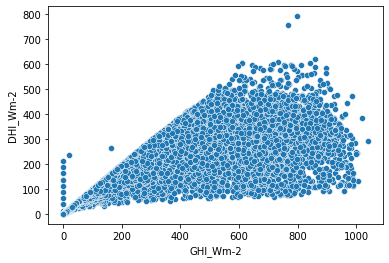

In [ ]:
sns.scatterplot(dfh['GHI_Wm-2'],dfh['DHI_Wm-2'])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='SunElevation_deg'>

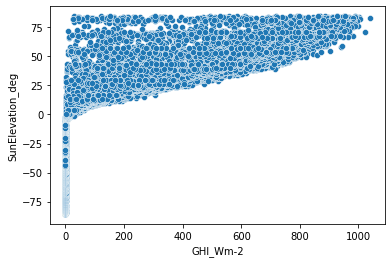

In [ ]:

sns.scatterplot(dfh['GHI_Wm-2'],dfh['SunElevation_deg'])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='Relative_Humidity_per100'>

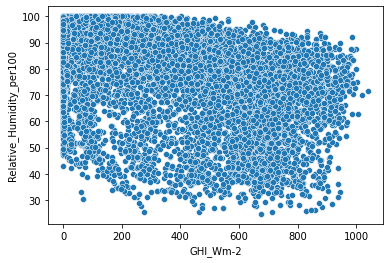

In [ ]:

sns.scatterplot(dfh['GHI_Wm-2'],dfh['Relative_Humidity_per100'])

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GHI_Wm-2', ylabel='WindSpeed_ms'>

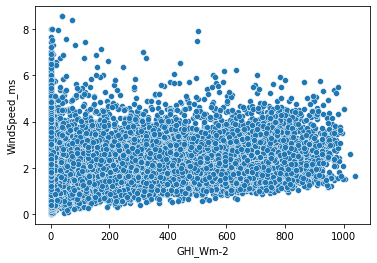

In [ ]:
sns.scatterplot(dfh['GHI_Wm-2'],dfh['WindSpeed_ms'])

In [ ]:
target_name = 'GHI_Wm-2'

y = dfh[target_name]

X = dfh.drop([target_name],axis=1)

In [ ]:
X.shape

(17477, 6)

In [ ]:
X.head()

,DHI_Wm-2,DNI_Wm-2,Relative_Humidity_per100,Temp_degC,WindSpeed_ms,SunElevation_deg
JulianTime,,,,,,
2017-06-08 00:00:00,139.695314,70.013164,86.121703,31.666510,1.697830,16.456584
2017-06-08 01:00:00,237.807800,180.883083,77.927108,37.448650,1.318106,29.725765
2017-06-08 02:00:00,257.939450,488.531533,71.908793,45.756140,1.550040,43.228362
2017-06-08 03:00:00,421.498983,263.250293,67.905498,52.135858,1.193106,56.884846
2017-06-08 04:00:00,324.551567,504.504767,64.189218,56.753695,1.129672,70.638031


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [ ]:
X_train.shape, X_test.shape

((13981, 6), (3496, 6))

In [ ]:
import seaborn as sns

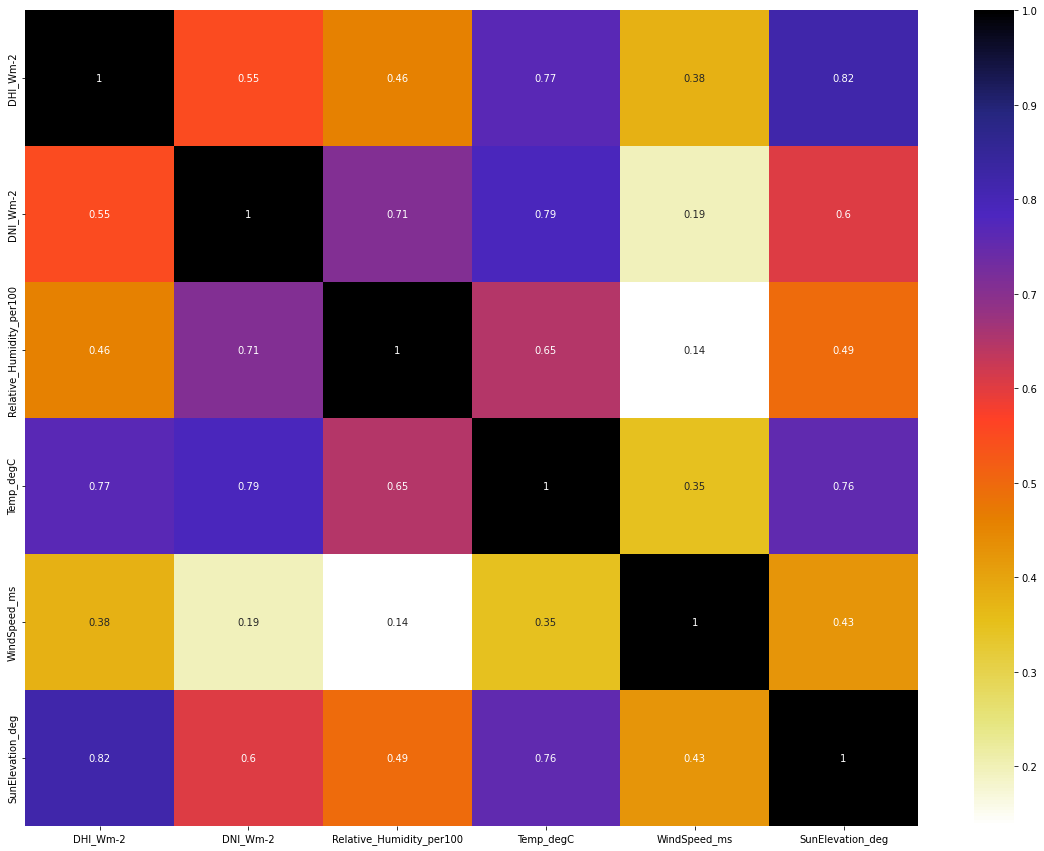

In [ ]:
plt.figure(figsize=(20,15))
cor = X_train.corr().abs()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#selecting highly correlated features
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
#correlated features
corr_features = correlation(X_train,0.6)
len(set(corr_features))
print('correlated features :', len(set(corr_features)))


correlated features : 3


In [ ]:
print('correlated features are :', corr_features)

correlated features are : {'Relative_Humidity_per100', 'Temp_degC', 'SunElevation_deg'}


In [ ]:
X_train.shape

(13981, 6)

In [ ]:
X_train_noncorr = X_train.drop(['Temp_degC','Relative_Humidity_per100'],axis = 1) #'Relative_Humidity_per100' ],axis=1)

In [ ]:
X_train_noncorr.shape

(13981, 4)

In [ ]:
#X_test_noncorr = X_test.drop(corr_features, axis=1)
X_test_noncorr = X_test.drop(['Temp_degC','Relative_Humidity_per100'],axis = 1)#, 'Relative_Humidity_per100' ], axis=1)

In [ ]:
X_test_noncorr.shape

(3496, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

X_train_noncorr = scaler.fit_transform( X_train_noncorr )
X_test_noncorr = scaler.transform( X_test_noncorr )

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train.shape, y_train.shape

((13981, 6), (13981,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
import datetime
start = datetime.datetime.now()
#from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(random_state = 1, n_estimators = 500)
RFC.fit(X_train,y_train)
end = datetime.datetime.now()
print('Total execution time :',end-start)

Total execution time : 0:00:38.139442


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = RFC.predict(X_test)

print('Mean Squared Error :',( mean_squared_error(y_test,y_pred)))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred))


Mean Squared Error : 126.02966873157335
Mean Absolute Error : 4.238676822205086


Text(0.5, 1.0, 'Actual vs. Predicted')

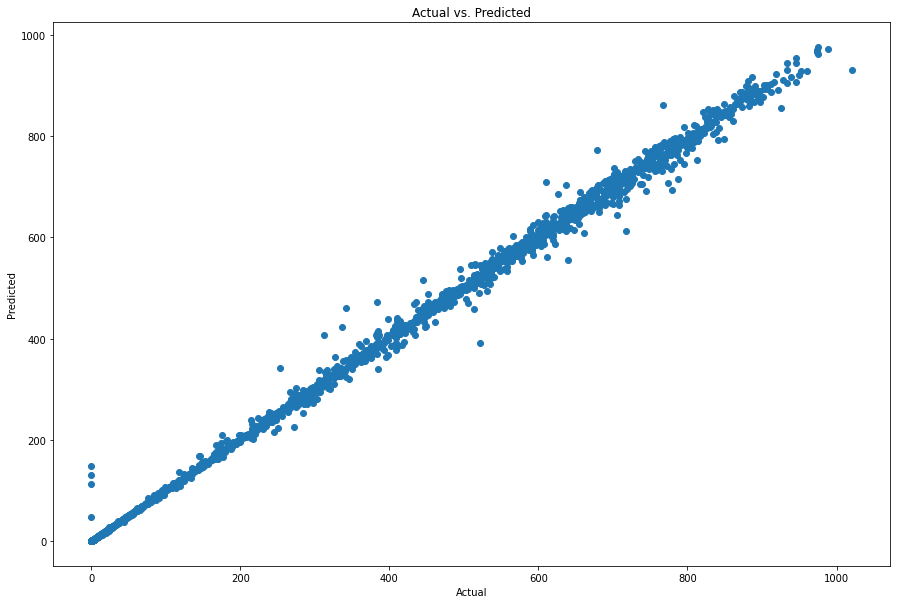

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:50]

,Actual Value,Predicted Value,Difference
JulianTime,,,
2019-01-23 01:00:00,125.261380,126.800117,-1.538737
2018-09-27 09:00:00,410.632800,384.136535,26.496265
2017-08-01 14:00:00,0.000250,0.001346,-0.001096
2018-03-11 23:00:00,0.005700,0.032185,-0.026485
2019-02-19 11:00:00,34.584712,35.092115,-0.507403
2018-07-05 18:00:00,0.003947,0.002787,0.001161
2017-10-12 06:00:00,368.594617,376.799222,-8.204605
2018-12-30 05:00:00,681.552450,675.502354,6.050096
2018-04-26 05:00:00,845.773483,841.341699,4.431784


In [ ]:
import datetime
start = datetime.datetime.now()
from sklearn.ensemble import RandomForestRegressor
RFC1 = RandomForestRegressor(random_state = 1,n_estimators = 500)
RFC1.fit(X_train_noncorr,y_train)
end = datetime.datetime.now()
print('Total execution time :',end-start)

Total execution time : 0:00:27.039193


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_noncorr = RFC1.predict(X_test_noncorr)

print('Mean Squared Error :', mean_squared_error(y_test,y_pred_noncorr))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_noncorr))


Mean Squared Error : 92.30593823816139
Mean Absolute Error : 3.446615738007964


Text(0.5, 1.0, 'Actual vs. Predicted NON_CORR')

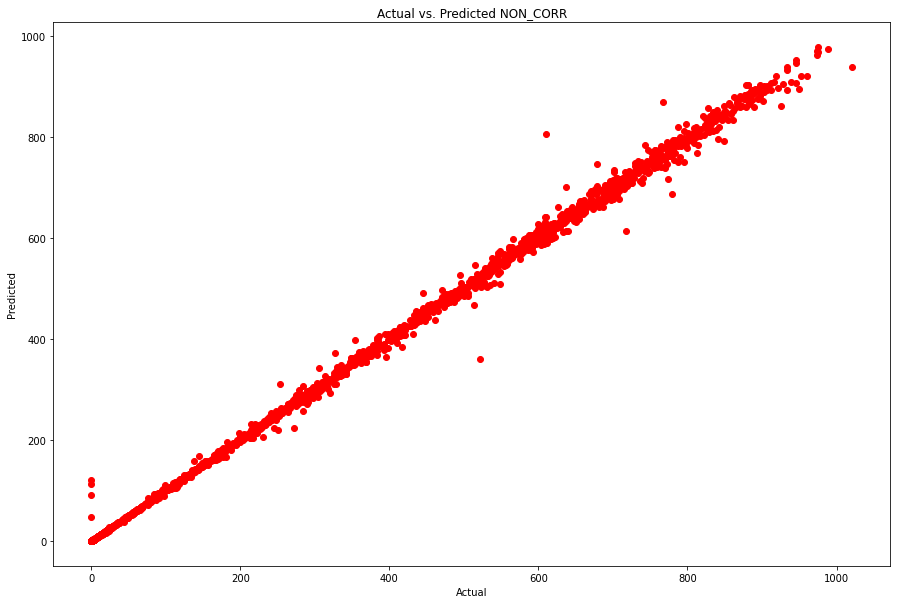

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred_noncorr,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted NON_CORR')

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
mod = XGBRegressor()

In [ ]:
m = mod.fit(X_train,y_train)

In [ ]:
y_pred_xgb = m.predict(X_test)

In [ ]:
print('Mean Squared Error :',( mean_squared_error(y_test,y_pred_xgb)))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_xgb))


Mean Squared Error : 119.03647960362667
Mean Absolute Error : 4.793429974608905


Text(0.5, 1.0, 'Actual vs. Predicted')

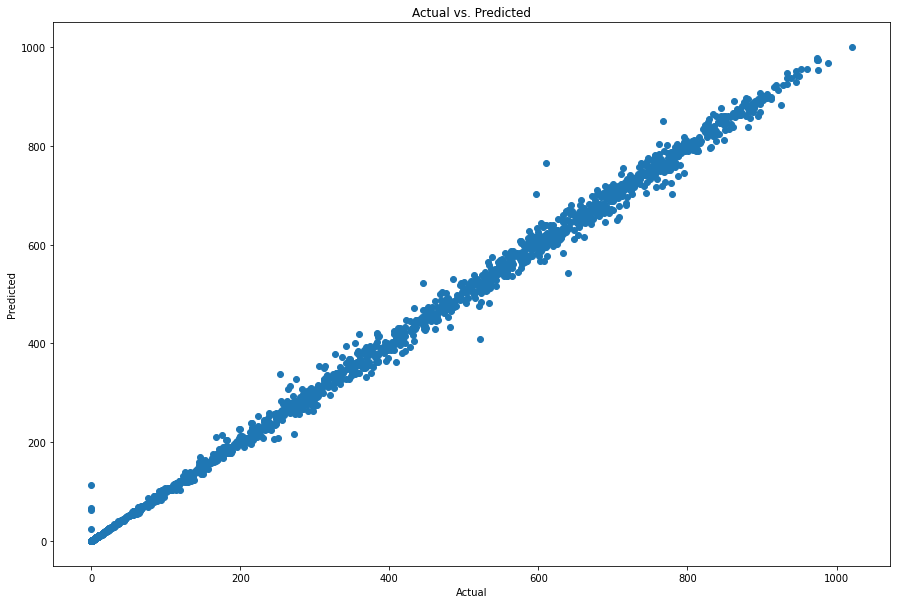

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
m1 = mod.fit(X_train_noncorr,y_train)

In [ ]:
y_pred_xgb_n = m1.predict(X_test_noncorr)

In [ ]:
print('Mean Squared Error :',( mean_squared_error(y_test,y_pred_xgb_n)))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_xgb_n))


Mean Squared Error : 91.39747152138602
Mean Absolute Error : 3.822168184924932


Text(0.5, 1.0, 'Actual vs. Predicted Non_CORR')

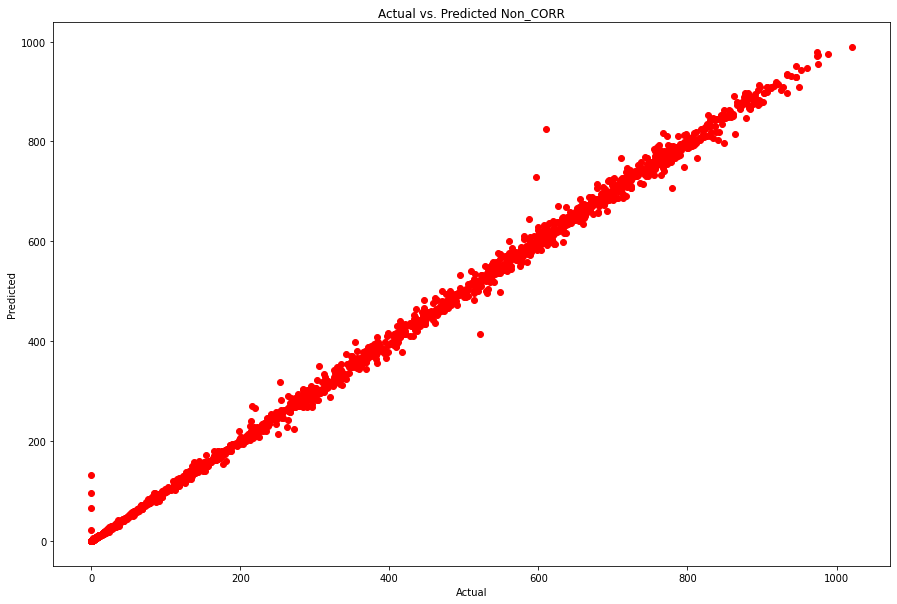

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred_xgb_n,color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Non_CORR')

In [ ]:

from sklearn.svm import SVR


import datetime
start = datetime.datetime.now()
regresso = SVR(kernel = 'rbf')
regresso.fit(X_train, y_train)
#RFC.fit(X_train,y_train)
end = datetime.datetime.now()
print('Total execution time :',end-start)

Total execution time : 0:00:09.587792


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_svm = regresso.predict(X_test)

print('Mean Squared Error :',( mean_squared_error(y_test,y_pred_svm)))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_svm))


Mean Squared Error : 1357.248009912151
Mean Absolute Error : 19.339791118283593


Text(0.5, 1.0, 'Actual vs. Predicted')

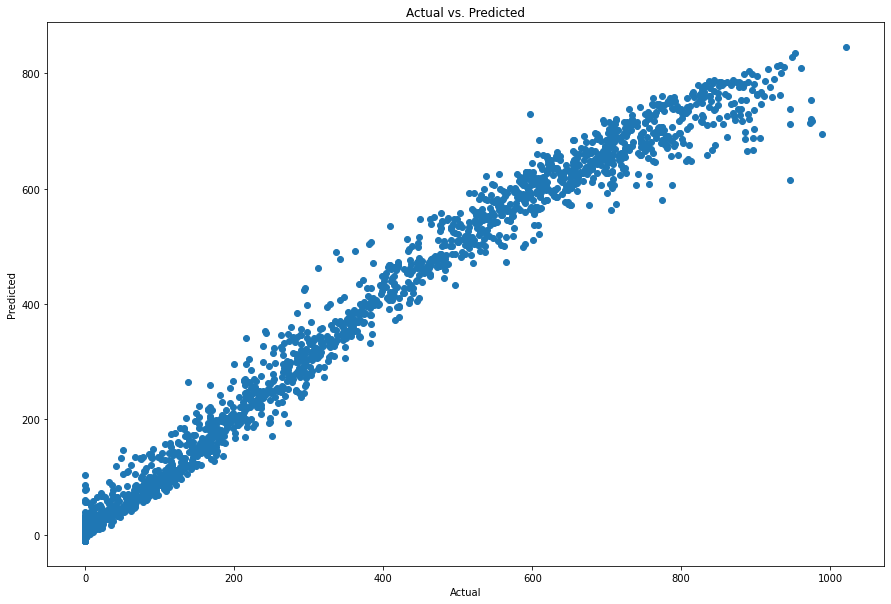

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred_svm)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
import datetime
start = datetime.datetime.now()
#from sklearn.ensemble import RandomForestRegressor
regresso1 = SVR(kernel = 'rbf')
regresso1.fit(X_train_noncorr, y_train)


end = datetime.datetime.now()
print('Total execution time :',end-start)

Total execution time : 0:00:09.542511


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_svm1 = regresso1.predict(X_test_noncorr)

print('Mean Squared Error :', mean_squared_error(y_test,y_pred_svm1))
print('Mean Absolute Error :', mean_absolute_error(y_test,y_pred_svm1))

Mean Squared Error : 1118.6185796578136
Mean Absolute Error : 13.499243670512968


Text(0.5, 1.0, 'Actual vs. Predicted NON_CORR')

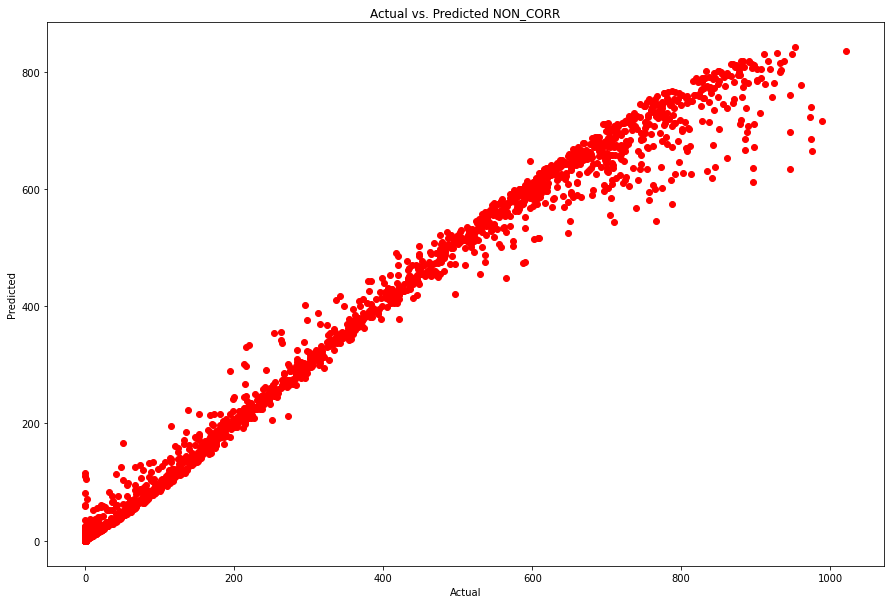

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred_svm1,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted NON_CORR')